In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Wczytaj dane z JSON
with open('/mnt/data/kusnierz/audio-data/WildSVDD/downloads/metadata.json', 'r') as f:
    wildsvdd_data = json.load(f)

with open('/mnt/data/kusnierz/audio-data/SingFake/download_log.json', 'r') as f:
    singfake_data = json.load(f)

# Filtruj tylko sukcesy
wildsvdd_success = [item for item in wildsvdd_data if item.get('success', False)]
singfake_success = [item for item in singfake_data if item.get('status') == 'success']

# Przekształć na DataFrame
df_wildsvdd = pd.DataFrame(wildsvdd_success)
df_singfake = pd.DataFrame(singfake_success)

# Dodaj kolumnę dataset dla identyfikacji
df_wildsvdd['dataset'] = 'WildSVDD'
df_singfake['dataset'] = 'SingFake'

# Połącz dane (tylko wspólne kolumny lub dodaj brakujące)
common_cols = ['Language', 'Model', 'Platform', 'Singer', 'Title', 'Url', 'Bonafide Or Deepfake', 'Created At', 'dataset']
df_combined = pd.concat([df_wildsvdd[common_cols], df_singfake.assign(**{col: None for col in common_cols if col not in df_singfake.columns})], ignore_index=True)

print("Podsumowanie danych:")
print(df_combined.info())
print("\nPierwsze wiersze:")
print(df_combined.head())

Podsumowanie danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Language              809 non-null    object
 1   Model                 809 non-null    object
 2   Platform              809 non-null    object
 3   Singer                809 non-null    object
 4   Title                 809 non-null    object
 5   Url                   809 non-null    object
 6   Bonafide Or Deepfake  809 non-null    object
 7   Created At            809 non-null    object
 8   dataset               2034 non-null   object
 9   url                   1225 non-null   object
 10  filename              1225 non-null   object
 11  filepath              1225 non-null   object
 12  status                1225 non-null   object
dtypes: object(13)
memory usage: 206.7+ KB
None

Pierwsze wiersze:
   Language    Model Platform Singer  \
0  Mandarin  un

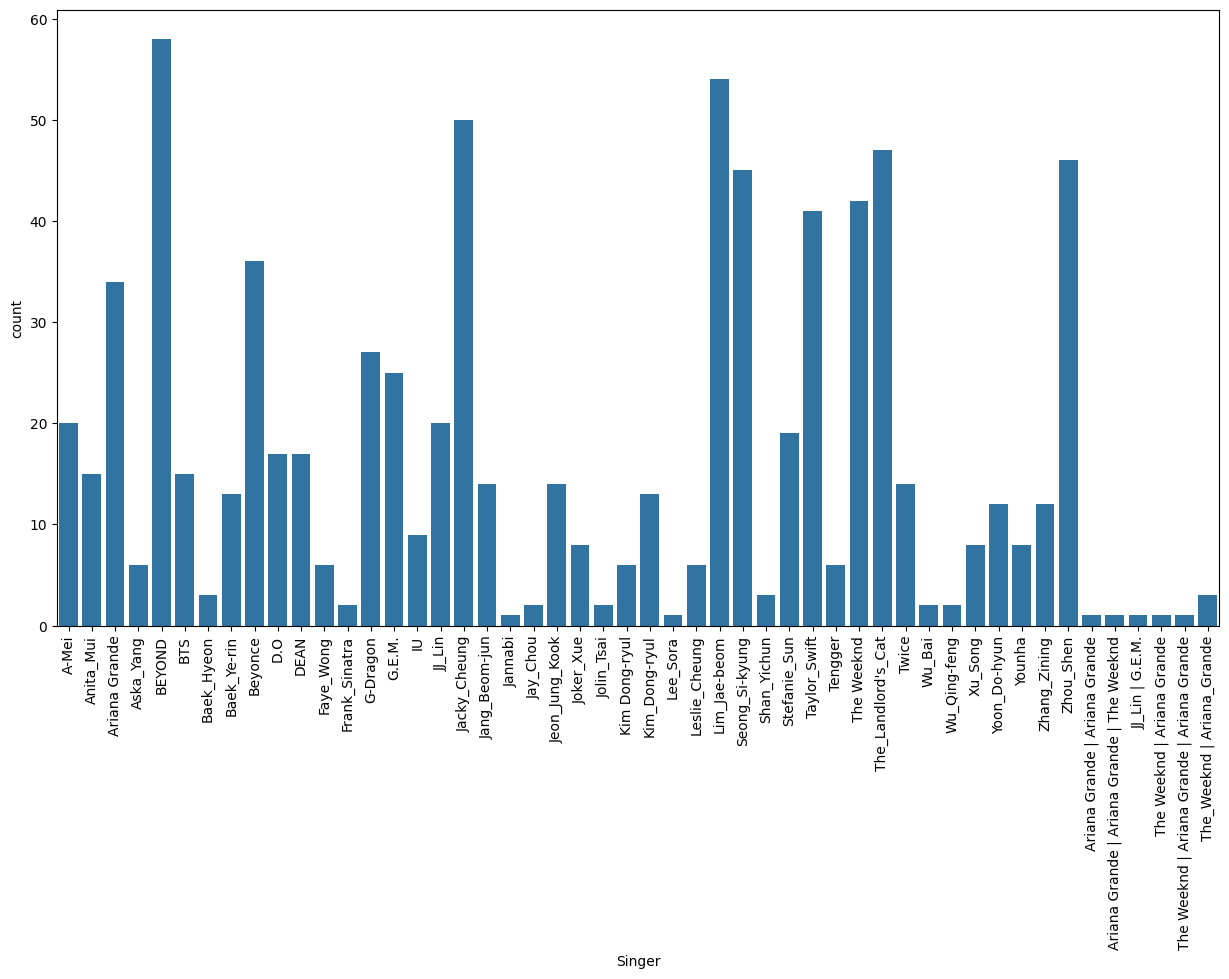

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(df_wildsvdd, x="Singer")
_ = plt.xticks(rotation=90)

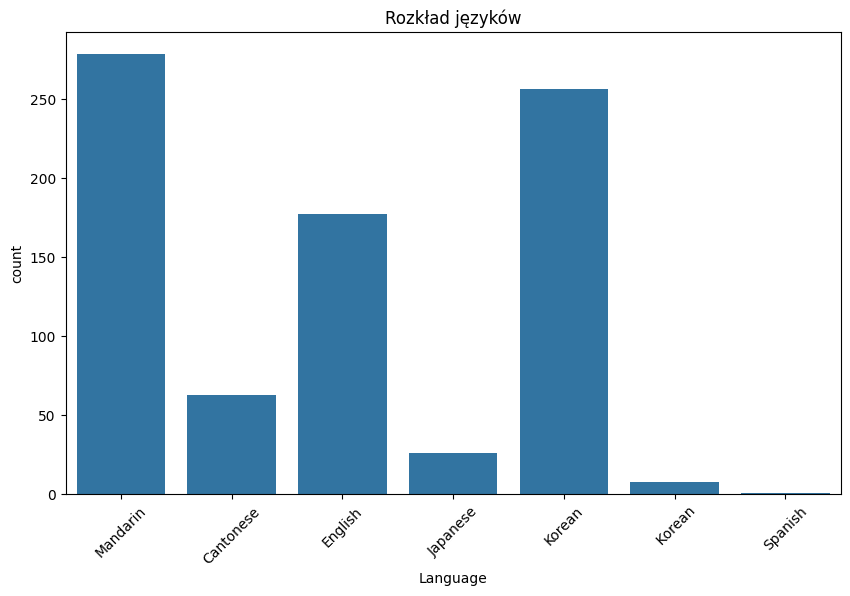

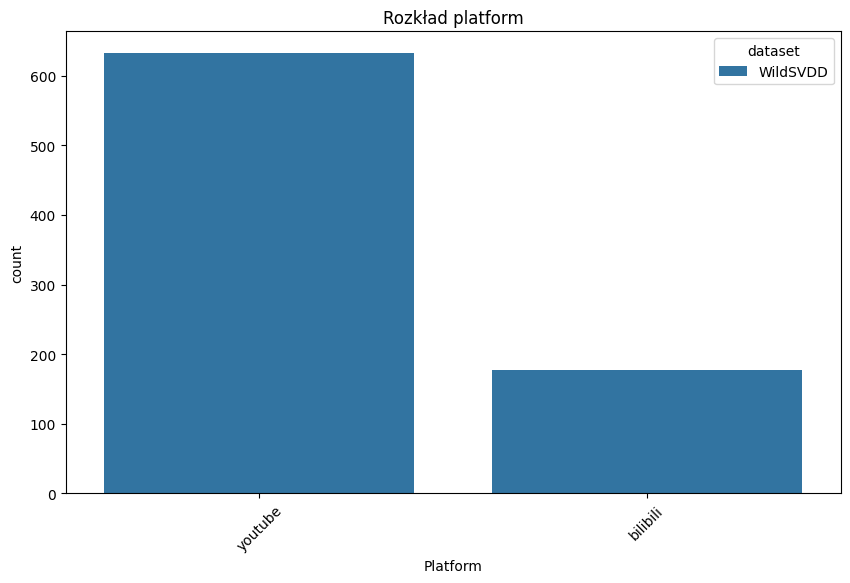

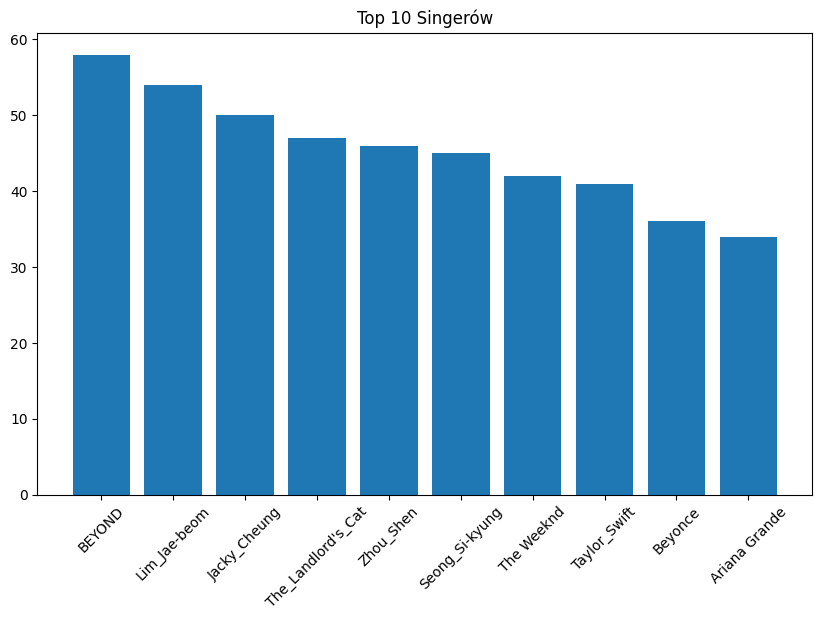

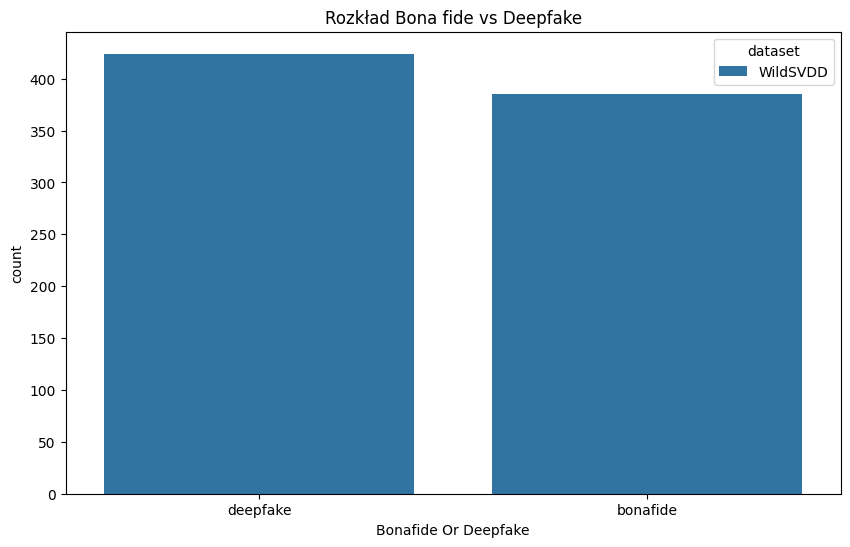

In [22]:
# Rozkład języków
plt.figure(figsize=(10, 6))
sns.countplot(data=df_wildsvdd, x='Language')
plt.title('Rozkład języków')
plt.xticks(rotation=45)
plt.show()

# Rozkład platform
plt.figure(figsize=(10, 6))
sns.countplot(data=df_wildsvdd, x='Platform', hue='dataset')
plt.title('Rozkład platform')
plt.xticks(rotation=45)
plt.show()

# Top 10 singerów
singer_counts = Counter(df_wildsvdd['Singer'].dropna())
top_singers = singer_counts.most_common(10)
singers, counts = zip(*top_singers)
plt.figure(figsize=(10, 6))
plt.bar(singers, counts)
plt.title('Top 10 Singerów')
plt.xticks(rotation=45)
plt.show()

# Rozkład bona fide vs deepfake
plt.figure(figsize=(10, 6))
sns.countplot(data=df_wildsvdd, x='Bonafide Or Deepfake', hue='dataset')
plt.title('Rozkład Bona fide vs Deepfake')
plt.show()


In [3]:
# Statystyki podsumowujące
print("\nStatystyki:")
print(f"Łączna liczba próbek: {len(df_combined)}")
print(f"Liczba próbek na dataset: {df_combined['dataset'].value_counts()}")
print(f"Rozkład języków: {df_combined['Language'].value_counts()}")
print(f"Rozkład platform: {df_combined['Platform'].value_counts()}")
print(f"Rozkład bona fide/deepfake: {df_combined['Bonafide Or Deepfake'].value_counts()}")

# Sprawdź brakujące wartości
print("\nBrakujące wartości:")
print(df_combined.isnull().sum())


Statystyki:
Łączna liczba próbek: 2034
Liczba próbek na dataset: dataset
SingFake    1225
WildSVDD     809
Name: count, dtype: int64
Rozkład języków: Language
Mandarin     278
Korean       256
English      177
Cantonese     63
Japanese      26
 Korean        8
Spanish        1
Name: count, dtype: int64
Rozkład platform: Platform
youtube     632
bilibili    177
Name: count, dtype: int64
Rozkład bona fide/deepfake: Bonafide Or Deepfake
deepfake    424
bonafide    385
Name: count, dtype: int64

Brakujące wartości:
Language                1225
Model                   1225
Platform                1225
Singer                  1225
Title                   1225
Url                     1225
Bonafide Or Deepfake    1225
Created At              1334
dataset                    0
url                      809
filename                 809
filepath                 809
status                   809
dtype: int64
